<img src="https://geekandchic.cl/wp-content/uploads/2016/06/Desafio-Latam-Logo-alta-resoluci%C3%B3n-1.jpg" alt="logo" style="width: 170px" align="right" hspace="10"/>

## Métodos de regularización lineal y expansiones basales
## Actividad 2: Modelos aditivos generalizados
### Sebastián Contreras Zambrano

## Descripción de la actividad
* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos. * Para esta actividad trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre `compresive_strength_concrete.csv` . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería `pyGAM`.

In [2]:
#importar librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from pygam import LinearGAM
import warnings
warnings.filterwarnings('ignore')

In [4]:
def inspeccion_datos(dataframe):
    """
    Esta función retorna las medias descriptivas para los variables continuos y la frecuencia para las variables discretas.
    Recibe como argumento un dataframe de pandas
    """
    for colname,serie in dataframe.iteritems():
        if pd.api.types.is_numeric_dtype(serie):
            print('"{}" es una variable continua, y su descripción es:'.format(colname))
            print('-----------')
            print(serie.describe())
            print('')
        else:
            frec=serie.value_counts('%')
            print('"{}" es una variable discreta, y su frecuencia es:'.format(colname))
            print('-----------')
            print(frec)
            print('')

### Conocer dataset

In [5]:
df = pd.read_csv('compresive_strength_concrete.csv')
display(df.head())
print(df.shape)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


(1030, 9)


In [14]:
inspeccion_datos(df)

"Cement (component 1)(kg in a m^3 mixture)" es una variable continua, y su descripción es:
-----------
count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: Cement (component 1)(kg in a m^3 mixture), dtype: float64

"Blast Furnace Slag (component 2)(kg in a m^3 mixture)" es una variable continua, y su descripción es:
-----------
count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64

"Fly Ash (component 3)(kg in a m^3 mixture)" es una variable continua, y su descripción es:
-----------
count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: Fly Ash (component 3)(kg i

### Revisar missing data

<Figure size 720x720 with 0 Axes>

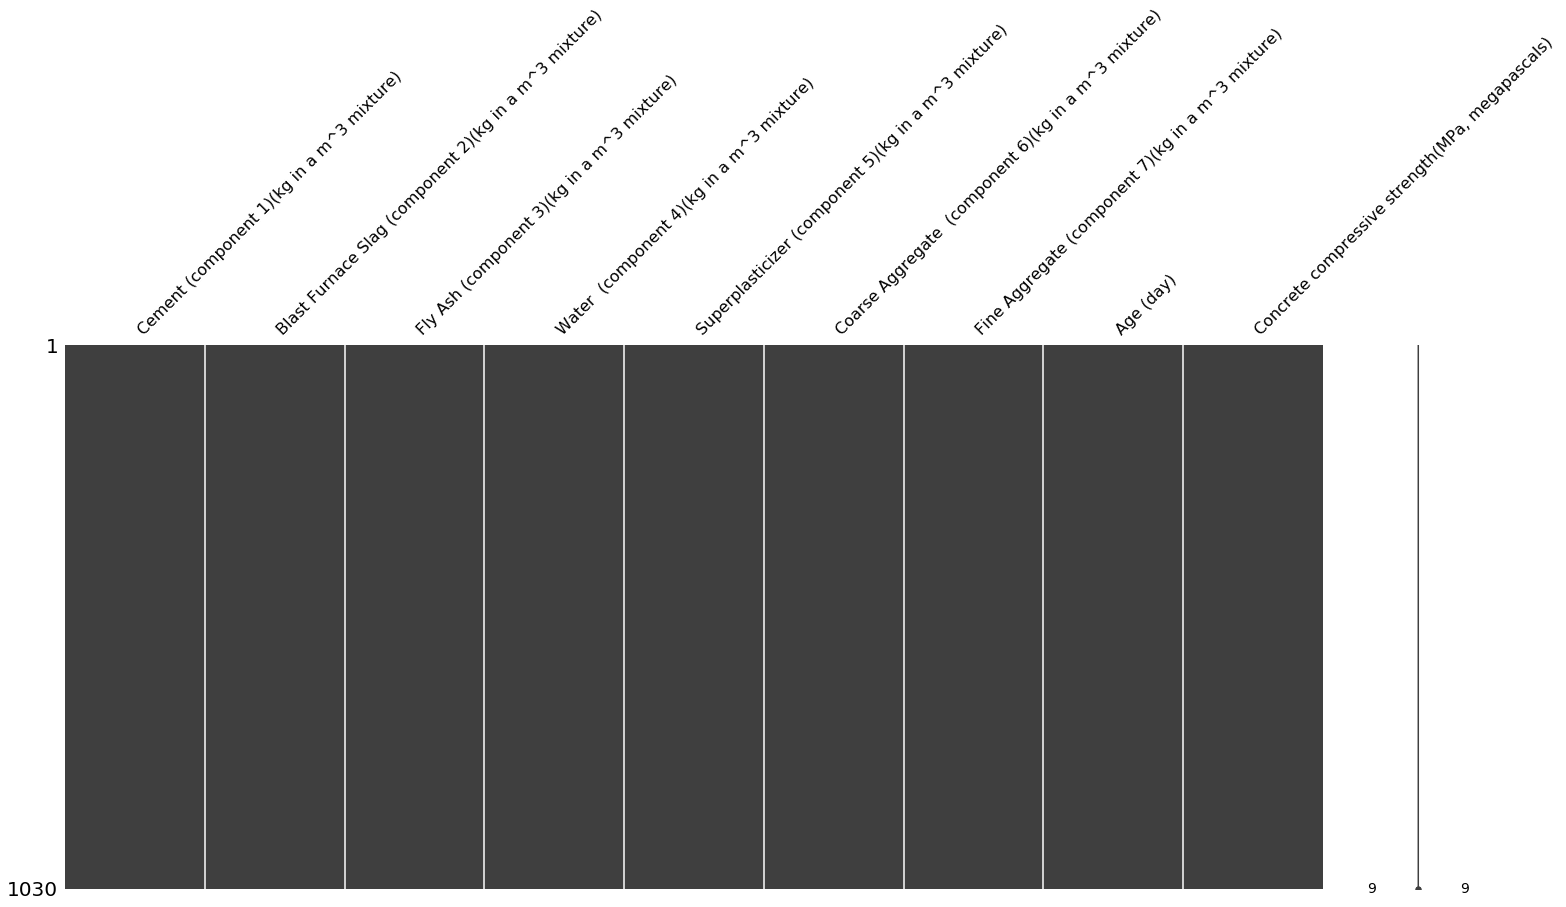

In [7]:
plt.figure(figsize=(10,10))
miss.matrix(df);
plt.tight_layout()

In [8]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

No existe missing data en el dataset

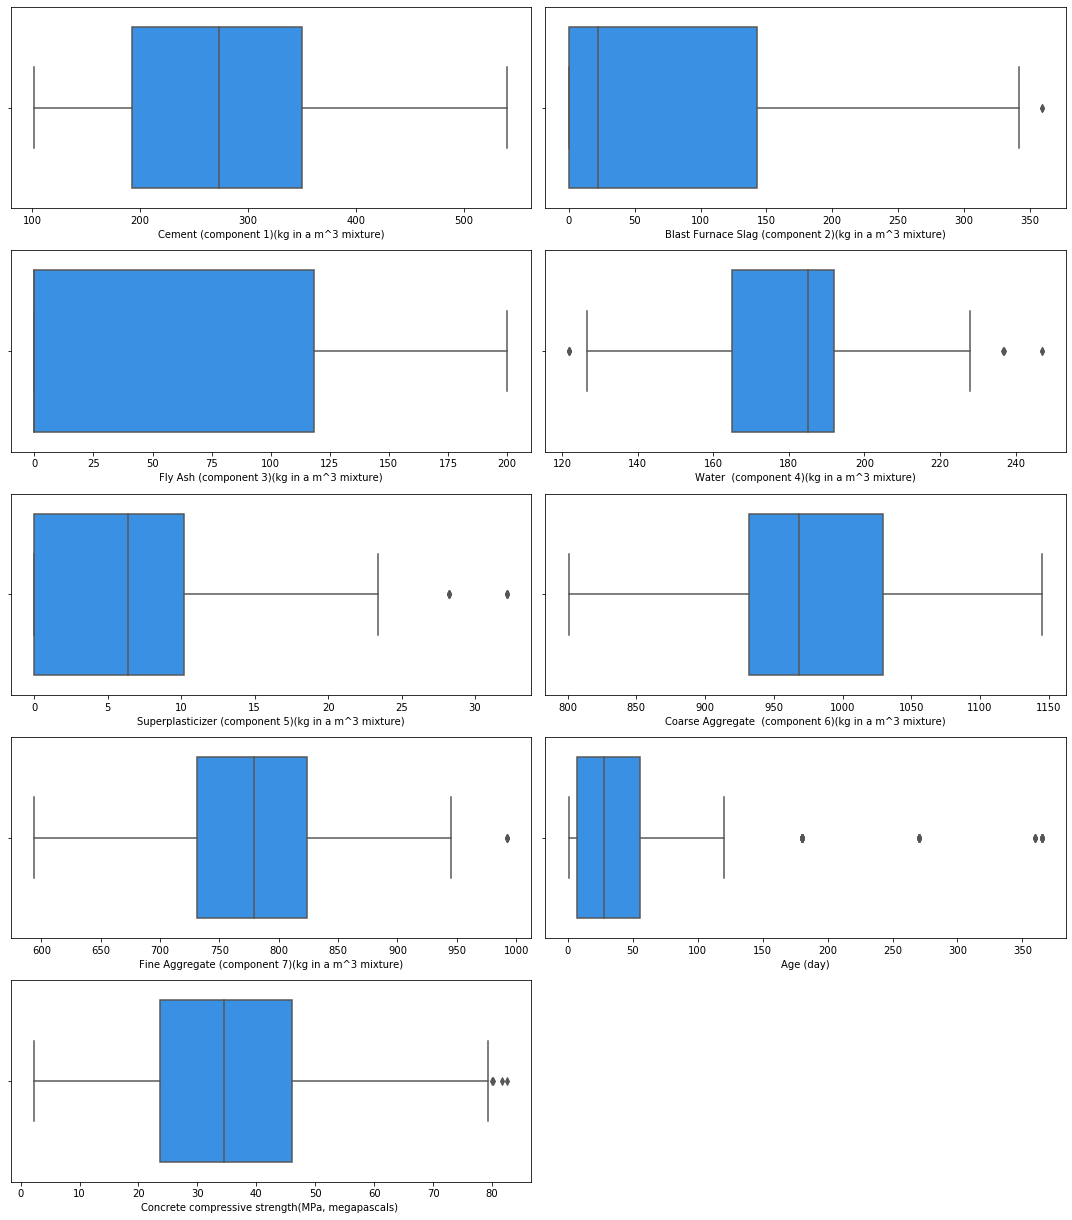

In [9]:
plt.figure(figsize=(15,20))
for index, (colname, serie) in enumerate (df.iteritems()):
    plt.subplot(6, 2, index+1)
    sns.boxplot(serie, color='dodgerblue')
    plt.tight_layout()

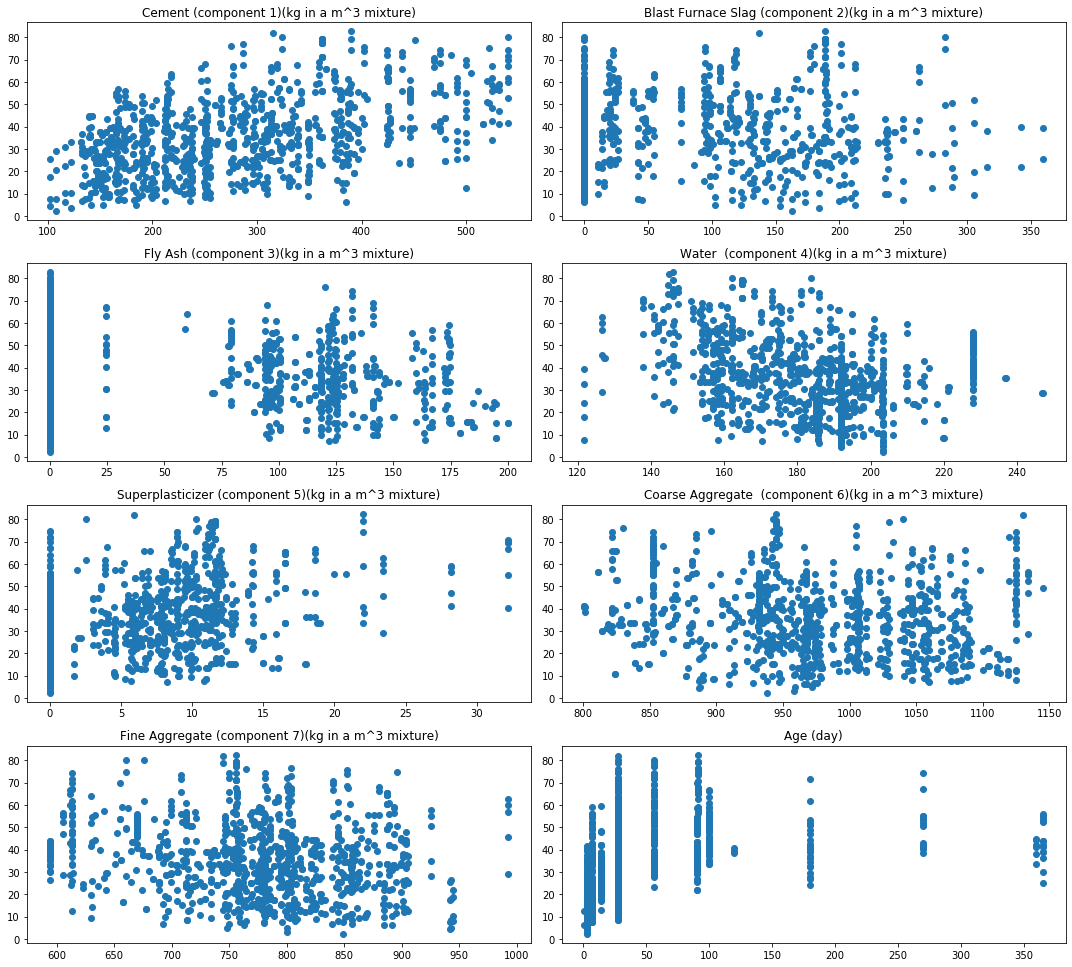

In [13]:
plt.figure(figsize=(15,20))
for index, (colname, serie) in enumerate (df.drop(columns=['Concrete compressive strength(MPa, megapascals) ']).iteritems()):
    plt.subplot(6, 2, index+1)
    plt.scatter(x=df[colname], y=df['Concrete compressive strength(MPa, megapascals) ']);
    plt.title(colname)
    plt.tight_layout()

## Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals).
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución.
* Decida si es necesario normalizarlos/escalarlos.

#### Renombrar variables

In [28]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [30]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'
},inplace=True)

### Observaciones 

* El vector objetivo es una variable continua con distribución normal, por lo cual, se debe trabajar con un modelo GAM de Regresión Líneal.
* Para generar una mejor distribución de los atributos, se procederá a escarlos con $ln(atributo+1)$


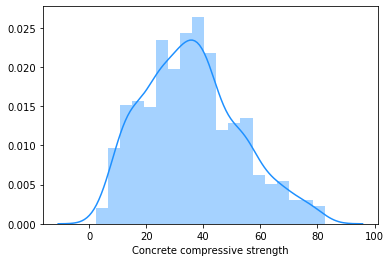

In [31]:
sns.distplot(df['Concrete compressive strength'], color='dodgerblue');

In [32]:
df_ln = df.copy()

for colname in df_ln:
    df_ln[colname] = np.log(df[colname]+1) 
    
display(df_ln.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296,4.394326
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296,4.141387
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.602119,3.720136
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.902633,3.738859
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,5.888878,3.813307


Se graficará el dataframe generado para revisar como varió la distribución de los datos

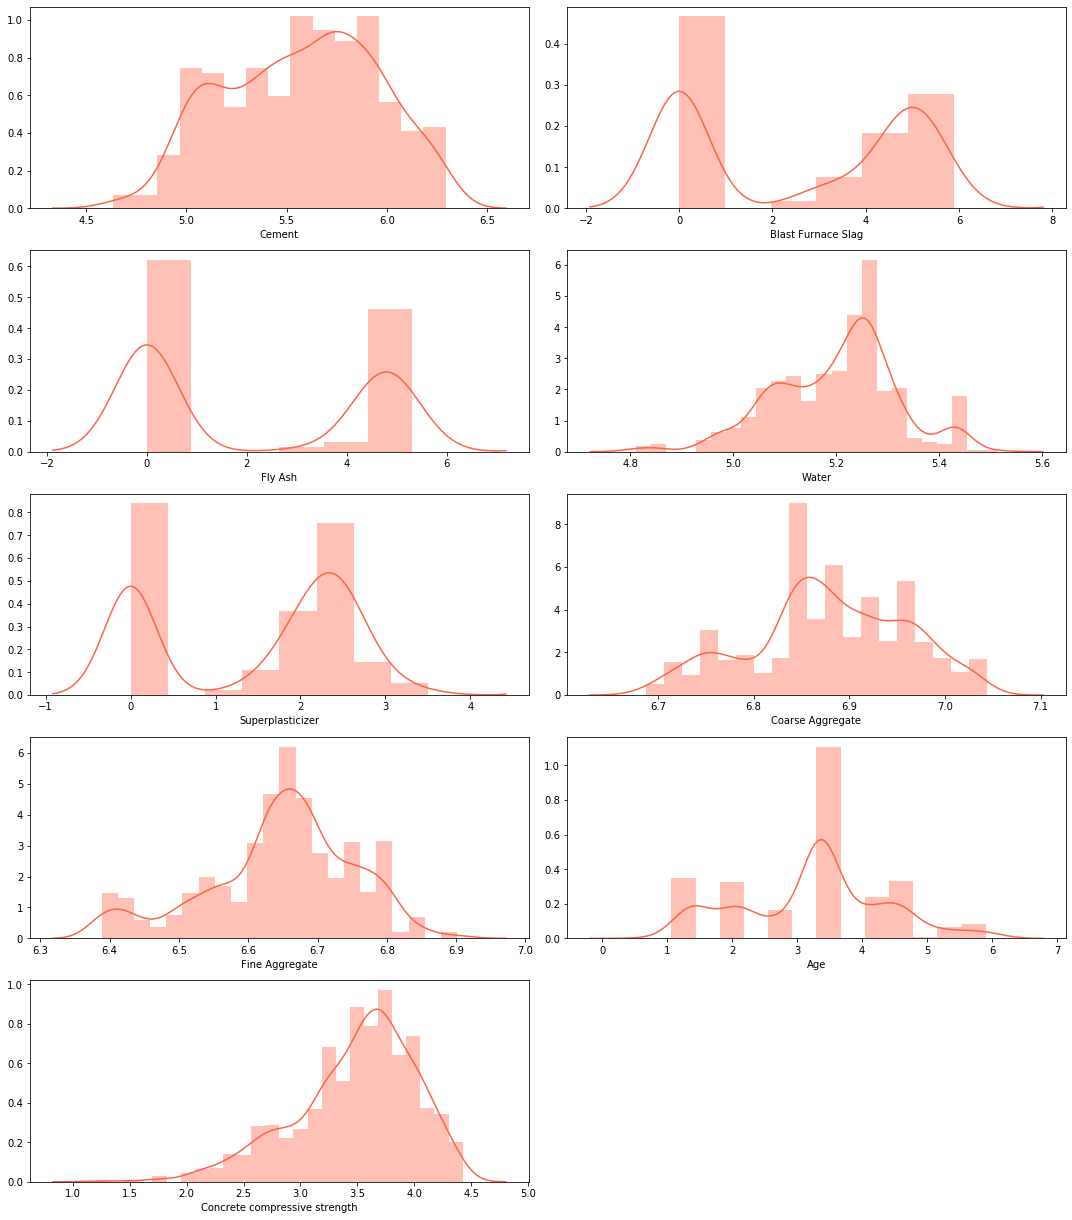

In [33]:
plt.figure(figsize=(15,20))
for index, (colname, serie) in enumerate (df_ln.iteritems()):
    plt.subplot(6, 2, index+1)
    sns.distplot(serie, color='tomato')
    plt.tight_layout()

## Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch . Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    df_ln.drop(columns='Concrete compressive strength'), 
    df_ln['Concrete compressive strength'], test_size = 0.3, random_state=250992)

In [35]:
#entrenamiento de modelo GAM Lineal sin GridSearch ni modificaciones de hiperparámetros
model_LinearGAM = LinearGAM().fit(X_train, y_train)

In [36]:
model_LinearGAM.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     73.9737
Link Function:                     IdentityLink Log Likelihood:                                 -8183.8017
Number of Samples:                          721 AIC:                                            16517.5507
                                                AICc:                                           16535.2121
                                                GCV:                                                0.0396
                                                Scale:                                              0.0324
                                                Pseudo R-Squared:                                   0.8961
Feature Function                  Lam

In [39]:
print(f"Mejor valor de lambda: {model_LinearGAM.lam}")

Mejor valor de lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]


In [43]:
print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
model_LinearGAM.predict(X_test)).round(3)))
print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
model_LinearGAM.predict(X_test))).round(3)))
print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
model_LinearGAM.predict(X_test)).round(3)))

Test R^2 accuracy: 0.886
Test RMSE accuracy: 0.176
Test MAE accuracy: 0.097


### Entrenamiento de modelo GAM Lineal con GridSearch

In [49]:
search_params = {'lam': np.logspace(-3,3, 11)}
model_LinearGAM_gs = LinearGAM().gridsearch(X_train.values, y_train, **search_params)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [50]:
model_LinearGAM_gs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     82.7432
Link Function:                     IdentityLink Log Likelihood:                                 -8319.3075
Number of Samples:                          721 AIC:                                            16806.1015
                                                AICc:                                           16828.4091
                                                GCV:                                                0.0395
                                                Scale:                                              0.0314
                                                Pseudo R-Squared:                                   0.9005
Feature Function                  Lam

In [51]:
print(f"Mejor valor de lambda: {model_LinearGAM_gs.lam}")

Mejor valor de lambda: [[0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796]]


In [52]:
print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
model_LinearGAM_gs.predict(X_test)).round(3)))
print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
model_LinearGAM_gs.predict(X_test))).round(3)))
print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
model_LinearGAM_gs.predict(X_test)).round(3)))

Test R^2 accuracy: 0.886
Test RMSE accuracy: 0.175
Test MAE accuracy: 0.096


## Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia

Se puede observar que los modelos obtuvieron estadísticos similares, sin embargo, optaré por el que fue entrenado con `GridSearch`, ya que este método nos permite obtener los mejores hiperparámetros.

In [98]:
def graph_dep_parcial(modelo):
    plt.figure(figsize=(15,15))
    attribute = X_train.columns

    for i, term in enumerate(modelo.terms):
        if term.isintercept:
            continue
        XX = modelo.generate_X_grid(term=i)
        pdep, confi = modelo.partial_dependence(term=i, X=XX, width=0.95)
        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(attribute[i])
        plt.tight_layout();

<Figure size 1080x1080 with 0 Axes>

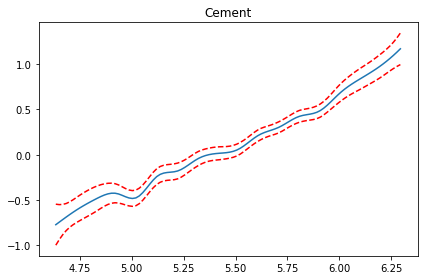

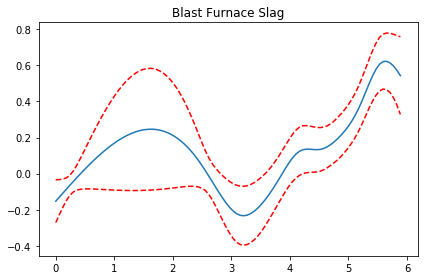

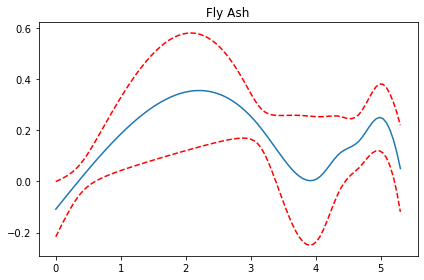

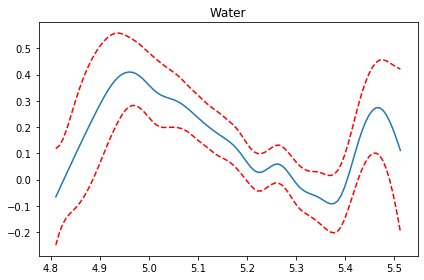

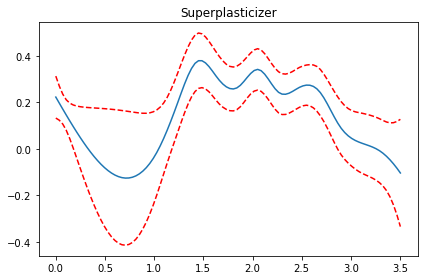

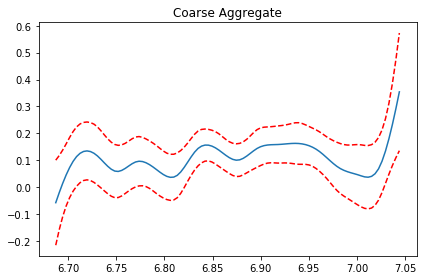

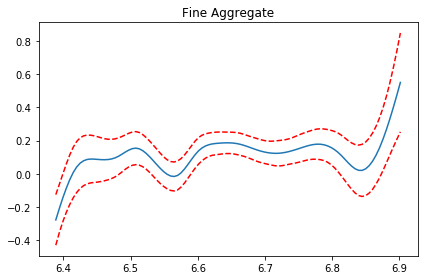

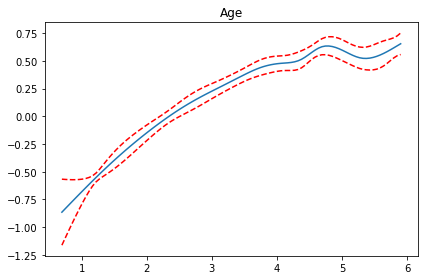

In [99]:
graph_dep_parcial(model_LinearGAM_gs)

Al analizar la grilla con los gráficos de dependencias parciales del Modelo LinearGAM, se pueden realizar las siguientes observaciones:
* Los atributos `Cement` y `Age`, se muestran más linealmente estable, ya que la varianza de la recta es menor (el área sombreada que representa los intervalos de confianza).
* De manera contraria, los atributos que presentan mayores niveles de resistencia son `Blast Furnance Slag`, `Fly Ash` y `Superplasticizer`, lo cual se puede observar gráficamente en la grilla. Esta situación parece estar relacionada con la concentranción de los datos (barras verticales bajo las rectas), ya que en los puntos donde la concentración es baja, se puede apreciar una mayor varianza en el intervalo de confianza.
* Una estrategia para regularizar los atributos que presentan mayor nivel de varianza sin aumentar los splines o términos polinomiales (que pueden derivar en reducir la eficiencia computacional y el tiempo de procesamiento del modelo) es aumentar el parámetro de penalización $\lambda$, pero esto debe realizarse evitando que el modelo genere rectas demaciados lineales, ya que el resultado no representará resultados similares a los fenómenos de la vida real.
* El objetivo que buscamos al entrenar el modelo con gridsearch y con la modificación de hiperparámetro lambda, es encontrar un óptimo de penalización para el modelo.